In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
insurance = pd.read_csv("insurance.csv")

In [63]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [64]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Viz

Text(0.5, 0, 'Sex')

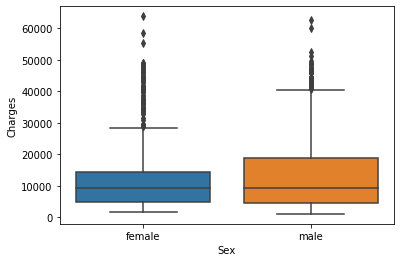

In [66]:
sns.boxplot(insurance["sex"], insurance["charges"])
plt.ylabel("Charges")
plt.xlabel("Sex")

In [67]:
insurance[["sex", "charges"]].groupby("sex").mean()

,charges
sex,
female,12569.578844
male,13956.751178


Text(0.5, 0, 'Sex')

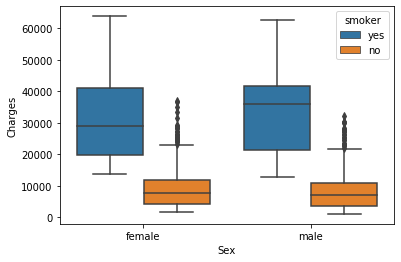

In [68]:
sns.boxplot(insurance["sex"], insurance["charges"], hue = insurance["smoker"]) # color/fill = variable
plt.ylabel("Charges")
plt.xlabel("Sex")

Text(0.5, 0, 'Region')

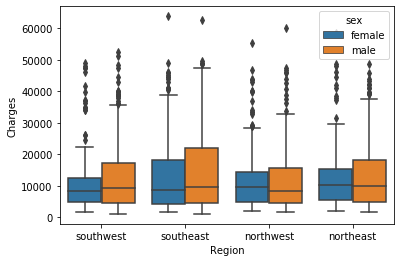

In [69]:
sns.boxplot(insurance["region"], insurance["charges"], hue = insurance["sex"])
plt.ylabel("Charges")
plt.xlabel("Region")

Text(0.5, 0, 'Region')

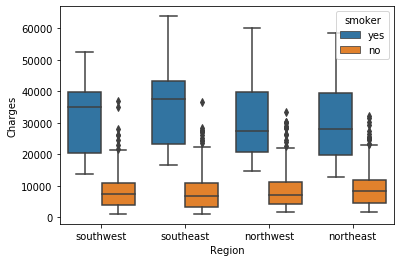

In [70]:
sns.boxplot(insurance["region"], insurance["charges"], hue = insurance["smoker"])
plt.ylabel("Charges")
plt.xlabel("Region")

Text(0.5, 0, 'Region')

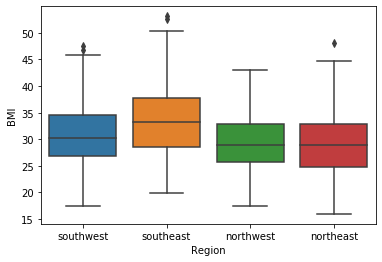

In [71]:
sns.boxplot(insurance["region"], insurance["bmi"])
plt.ylabel("BMI")
plt.xlabel("Region")

## Modeling

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
insurance_dummy = pd.get_dummies(insurance)

In [74]:
insurance_dummy

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [75]:
X = insurance_dummy.drop("charges", axis = 1)

In [76]:
y = insurance_dummy["charges"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
linreg = LinearRegression()

In [152]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
linreg.score(X_train, y_train)

0.7444680863937065

In [154]:
y_pred = linreg.predict(X_test)

In [167]:
lin_reg_mae = mean_absolute_error(y_test, y_pred)

In [168]:
lin_reg_r2 = r2_score(y_test, y_pred)

## Random Forest

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
random_forest = RandomForestRegressor(n_estimators = 500, criterion = "mse", random_state = 42)

In [171]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [172]:
random_forest.score(X_train, y_train)

0.9762800312972221

In [173]:
y_pred_rand = random_forest.predict(X_test)

In [174]:
random_forest_mae = mean_absolute_error(y_test, y_pred_rand)

In [175]:
random_forest_r2 = r2_score(y_test, y_pred_rand)

## Compare Models

In [176]:
d = {"Model": ["Linear Regression", "Linear Regression", "Random Forest", "Random Forest"], "Metric": ["MAE", "R2", "MAE", "R2"],
       "Value": [lin_reg_mae, lin_reg_r2, random_forest_mae, random_forest_r2]}

In [177]:
compare_df = pd.DataFrame(data = d)

In [178]:
compare_df

,Model,Metric,Value
0,Linear Regression,MAE,4224.888532
1,Linear Regression,R2,0.767426
2,Random Forest,MAE,2546.393405
3,Random Forest,R2,0.852300


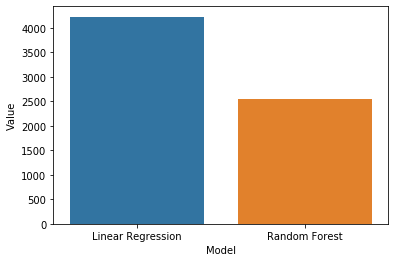

In [179]:
sns.barplot(compare_df["Model"], compare_df[compare_df["Metric"] == "MAE"]["Value"])

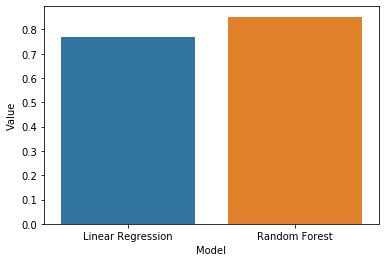

In [180]:
sns.barplot(compare_df["Model"], compare_df[compare_df["Metric"] == "R2"]["Value"])

Due to the randomForest model having a lower MAE and a higher R2 value, it fits the data better than the linear regression, so we will choose the randomForest model as the best out of the 2.

In [ ]:
random_